# Weather Forecast Using  PyOWM
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
PyOWM is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1 Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [1]:
# import libraries
#from pyowm import OWM
import pyowm
import pandas as pd
import seaborn as sns

In [2]:
# Set API key
owm = pyowm.OWM('3fb62110b42fec1124c89b9931aed05b')

In [3]:
# Define the default parameters
city = 'New York,US'

In [4]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [5]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [6]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [7]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [28]:
df

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-06 03:00:00+00:00,21,63,2.05,3.48,2.05,few clouds,http://openweathermap.org/img/w/02n.png,0.00
1,2019-12-06 06:00:00+00:00,12,65,1.34,2.41,1.34,few clouds,http://openweathermap.org/img/w/02n.png,0.00
2,2019-12-06 09:00:00+00:00,70,64,1.21,1.93,1.21,broken clouds,http://openweathermap.org/img/w/04n.png,0.00
3,2019-12-06 12:00:00+00:00,82,66,1.47,1.83,1.47,broken clouds,http://openweathermap.org/img/w/04n.png,0.00
4,2019-12-06 15:00:00+00:00,49,67,3.58,3.58,3.58,scattered clouds,http://openweathermap.org/img/w/03d.png,0.00
5,2019-12-06 18:00:00+00:00,74,63,7.39,7.39,7.39,broken clouds,http://openweathermap.org/img/w/04d.png,0.00
6,2019-12-06 21:00:00+00:00,100,65,9.00,9.00,9.00,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
7,2019-12-07 00:00:00+00:00,100,70,8.77,8.77,8.77,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
8,2019-12-07 03:00:00+00:00,88,64,6.00,6.00,6.00,light rain,http://openweathermap.org/img/w/10n.png,0.06
9,2019-12-07 06:00:00+00:00,44,67,3.47,3.47,3.47,scattered clouds,http://openweathermap.org/img/w/03n.png,0.00


In [29]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
#df_mean.drop('datetime', axis=1, inplace=True)
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-06,58.285714,64.714286,3.72000,4.231429,3.72000,0.00000
2019-12-07,66.000000,62.250000,3.63125,3.631250,3.63125,0.00750
2019-12-08,34.000000,56.125000,1.94625,1.946250,1.94625,0.00000
2019-12-09,100.000000,81.875000,8.53750,8.537500,8.53750,0.48375
2019-12-10,100.000000,94.000000,12.41125,12.411250,12.41125,3.15625
2019-12-11,100.000000,89.000000,10.64000,10.640000,10.64000,7.25000


In [30]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-06,100,67,9.00,9.00,9.00,scattered clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-12-07,100,70,8.77,8.77,8.77,scattered clouds,http://openweathermap.org/img/w/10n.png,0.06
2019-12-08,100,59,6.41,6.41,6.41,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
2019-12-09,100,97,11.60,11.60,11.60,overcast clouds,http://openweathermap.org/img/w/10d.png,2.56
2019-12-10,100,96,13.18,13.18,13.18,overcast clouds,http://openweathermap.org/img/w/10n.png,13.25
2019-12-11,100,89,10.64,10.64,10.64,moderate rain,http://openweathermap.org/img/w/10n.png,7.25


In [31]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-06,12,63,1.21,1.83,1.21,broken clouds,http://openweathermap.org/img/w/02n.png,0.00
2019-12-07,15,52,0.99,0.99,0.99,broken clouds,http://openweathermap.org/img/w/02d.png,0.00
2019-12-08,0,53,-0.35,-0.35,-0.35,broken clouds,http://openweathermap.org/img/w/01n.png,0.00
2019-12-09,100,62,6.91,6.91,6.91,light rain,http://openweathermap.org/img/w/04n.png,0.00
2019-12-10,100,91,11.70,11.70,11.70,heavy intensity rain,http://openweathermap.org/img/w/04n.png,0.00
2019-12-11,100,89,10.64,10.64,10.64,moderate rain,http://openweathermap.org/img/w/10n.png,7.25


In [32]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
2019-12-06,1.21,9.00,3.72000
2019-12-07,0.99,8.77,3.63125
2019-12-08,-0.35,6.41,1.94625
2019-12-09,6.91,11.60,8.53750
2019-12-10,11.70,13.18,12.41125
2019-12-11,10.64,10.64,10.64000


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

In [ ]:

sns_plot = sns.factorplot(x='label_capitalized', y='sentiment_percentage', hue='sentiment', data=df_melt, kind='bar')
sns_plot.set_xticklabels(rotation=15)
sns_plot.set_xlabels('Author', fontsize=14)
sns_plot.set_ylabels('Sentiment %', fontsize=14)
sns_plot.set_titles('Sentiment Analysis')
sns_plot.savefig("barplot.png", dpi=600, orientation ='landscape', bbox_inches='tight')
ax.figure.savefig("similarity.png", dpi=400)

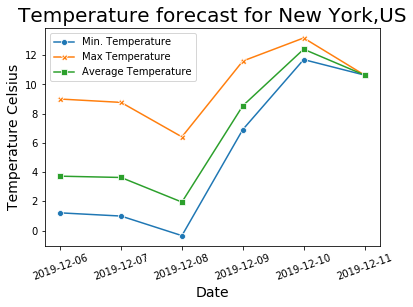

In [55]:
sns_plot = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for {city}', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)

#ax.ylim(0, 35)
#sns.plt.ylim(0, 20)


sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])

sns_plot.figure.savefig(f'{city}_temperature.png', 
                  dpi=600, facecolor='w', 
                  orientation='portrait',
                  figsize=(21, 9))


In [38]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day

,rain_vol
datetime,
2019-12-06 00:00:00+00:00,0.00
2019-12-07 00:00:00+00:00,0.06
2019-12-08 00:00:00+00:00,0.00
2019-12-09 00:00:00+00:00,3.87
2019-12-10 00:00:00+00:00,25.25
2019-12-11 00:00:00+00:00,7.25


In [39]:
df.set_index('datetime', drop=True, inplace=True)

In [40]:
df.head()

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,
2019-12-06 03:00:00+00:00,21,63,2.05,3.48,2.05,few clouds,http://openweathermap.org/img/w/02n.png,0.0
2019-12-06 06:00:00+00:00,12,65,1.34,2.41,1.34,few clouds,http://openweathermap.org/img/w/02n.png,0.0
2019-12-06 09:00:00+00:00,70,64,1.21,1.93,1.21,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2019-12-06 12:00:00+00:00,82,66,1.47,1.83,1.47,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2019-12-06 15:00:00+00:00,49,67,3.58,3.58,3.58,scattered clouds,http://openweathermap.org/img/w/03d.png,0.0


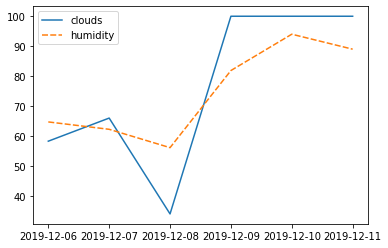

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']])
#ax2 = ax1.twinx()
#ax2 = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax2.grid(False)
plt.show()

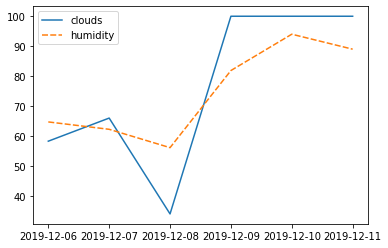

In [42]:
#ax = sns.lineplot(x=df.index, y="temp",
#                markers=True, dashes=False, data=df)
ax = sns.lineplot(data=df_mean[['clouds', 'humidity']])
#ax = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax = sns.barplot(data=df_rain_per_day)

In [22]:
df.resample('D', on='datetime').mean()


,clouds,humidity,temp,temp_max,temp_min,rain_vol
datetime,,,,,,
2019-11-30 00:00:00+00:00,70.625,69.000,22.51000,22.69750,22.51000,0.25000
2019-12-01 00:00:00+00:00,54.000,56.875,25.75000,25.75000,25.75000,0.00750
2019-12-02 00:00:00+00:00,68.000,64.750,22.16375,22.16375,22.16375,0.00000
2019-12-03 00:00:00+00:00,85.125,72.625,20.06375,20.06375,20.06375,0.00000
2019-12-04 00:00:00+00:00,91.500,69.875,22.53250,22.53250,22.53250,0.60125
